In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np

In [2]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [3]:
X

array([[-9.17167816, -1.75885288],
       [-3.86690897, -5.90126842],
       [ 4.68290334, -1.35178998],
       ...,
       [-4.8086692 , -5.40972729],
       [-4.1723341 , -5.33262221],
       [ 5.98155139, -2.07946634]])

In [4]:
y

array([1, 2, 0, 1, 2, 0, 1, 0, 0, 2, 1, 0, 0, 1, 2, 1, 0, 2, 1, 2, 0, 0,
       2, 1, 1, 1, 2, 0, 0, 0, 0, 1, 0, 1, 2, 1, 2, 2, 1, 1, 0, 1, 2, 2,
       1, 1, 0, 2, 1, 1, 1, 0, 2, 0, 1, 1, 2, 2, 2, 1, 1, 2, 0, 1, 2, 0,
       0, 0, 0, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 0, 2, 1, 1, 2, 0, 1, 0, 1,
       0, 2, 0, 0, 2, 1, 2, 2, 1, 1, 1, 0, 2, 0, 2, 2, 0, 2, 1, 0, 1, 1,
       2, 0, 0, 2, 0, 0, 2, 1, 0, 1, 0, 0, 1, 2, 2, 2, 1, 0, 2, 2, 0, 1,
       2, 2, 1, 2, 0, 1, 0, 0, 2, 2, 1, 2, 1, 2, 0, 1, 0, 0, 1, 0, 2, 2,
       0, 0, 0, 1, 0, 0, 0, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 1, 2, 1, 2, 1, 1, 0, 2, 0,
       0, 1, 0, 1, 2, 2, 0, 1, 0, 2, 1, 2, 0, 0, 1, 2, 1, 1, 2, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 1, 2, 2, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 2, 1, 0, 2, 1, 2, 1, 0, 2, 1, 1, 2,
       0, 1, 1, 1, 2, 0, 1, 1, 2, 2, 2, 2, 0, 1, 1, 2, 2, 0, 1, 2, 1, 2,
       0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 2, 0, 2, 0, 1,

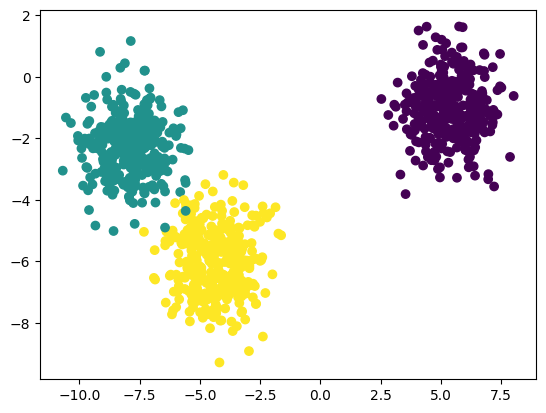

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [9]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [10]:
from sklearn.cluster import KMeans

In [11]:
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [12]:
wcss

[1340.0000000000005,
 454.08409039972605,
 138.5342812881638,
 115.10964569375179,
 85.14805725881278,
 61.973165252167604,
 55.64195930345464,
 49.02873504289564,
 47.35921488209052,
 40.86171736491026]

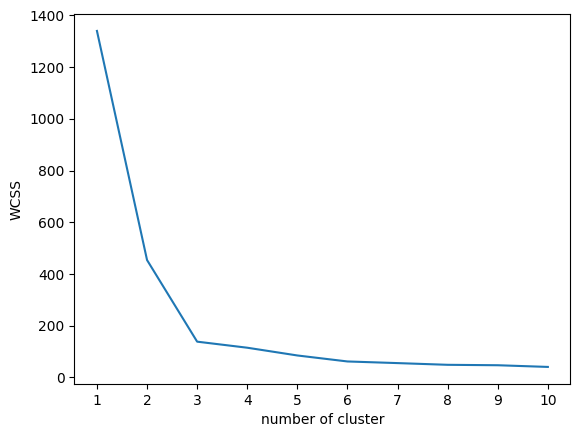

In [13]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("number of cluster")
plt.ylabel("WCSS")
plt.show()

In [14]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [15]:
kmeans.fit_predict(X_train_scaled)

array([1, 0, 0, 0, 2, 0, 2, 2, 0, 2, 1, 2, 0, 1, 1, 1, 2, 1, 0, 2, 0, 1,
       1, 0, 1, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1, 2, 0, 1, 2, 0, 1, 0,
       2, 2, 2, 2, 0, 0, 1, 1, 2, 1, 0, 0, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1,
       2, 1, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 0, 1, 2, 1, 2, 0, 2, 0, 2, 0,
       0, 0, 2, 2, 1, 2, 2, 0, 1, 1, 2, 1, 1, 0, 1, 0, 2, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 2, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 2, 0, 2, 1, 2, 1, 0, 0, 0, 2, 2, 2, 2, 1, 0, 1,
       2, 2, 1, 2, 2, 1, 0, 0, 1, 1, 1, 2, 0, 1, 0, 1, 1, 0, 2, 0, 0, 0,
       1, 2, 2, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1,
       1, 2, 1, 0, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 2, 2, 1, 1, 1, 0, 2,
       1, 1, 2, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 2, 1, 2, 0, 1,
       1, 2, 1, 1, 2, 1, 0, 2, 2, 1, 1, 0, 1, 0, 0, 1, 2, 2, 1, 0, 1, 2,
       0, 0, 0, 1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 2, 1, 1, 1,
       2, 0, 0, 2, 2, 2, 1, 1, 0, 2, 2, 2, 2, 0, 1,

In [16]:
y_pred=kmeans.predict(X_test_scaled)

In [17]:
y_pred

array([2, 0, 2, 0, 1, 2, 0, 0, 2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 0, 2, 1, 2,
       0, 2, 0, 1, 0, 0, 2, 2, 1, 0, 1, 0, 0, 0, 1, 2, 2, 2, 0, 2, 1, 1,
       0, 2, 2, 1, 1, 0, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1, 2, 1, 1, 1, 0,
       0, 0, 2, 1, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0,
       2, 2, 0, 2, 2, 0, 1, 0, 2, 0, 2, 1, 1, 1, 0, 2, 2, 1, 2, 0, 1, 2,
       2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 2, 2, 2, 1, 2, 0, 2, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 2, 0, 2, 1, 2, 0, 2, 2, 0, 2, 2, 2, 1, 0, 2, 1, 1, 1, 2,
       2, 2, 0, 1, 2, 2, 2, 2, 1, 2, 0, 0, 0, 1, 1, 1, 2, 1, 0, 0, 1, 0,
       2, 1, 1, 2, 0, 0, 1, 1, 2, 1, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 2, 0,
       1, 1, 2, 2, 2, 1, 0, 0, 2, 2, 2, 2, 1, 1, 0, 1, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 0, 0, 1, 0, 0, 2, 1, 1, 1, 2, 2, 0, 2, 1, 0, 1, 0, 0,
       0, 0, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 0, 0, 1,

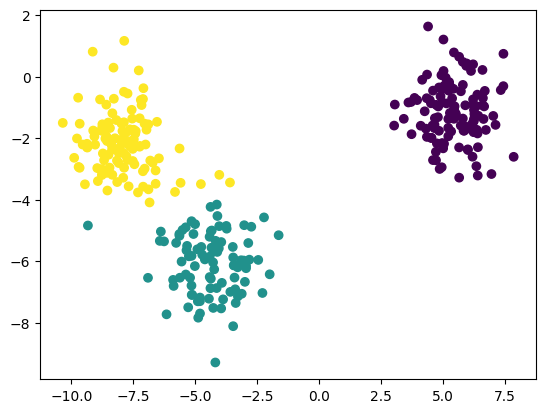

In [19]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [20]:
%pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [21]:
from kneed import KneeLocator

In [22]:
kl=KneeLocator(range(1,11),wcss,curve='convex',direction="decreasing")

In [23]:
kl.elbow

np.int64(3)

In [24]:
from sklearn.metrics import silhouette_score

In [25]:
silhouette_coeff=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coeff.append(score)

In [26]:
silhouette_coeff

[np.float64(0.6398187272852565),
 np.float64(0.6919061328468737),
 np.float64(0.6195958841691575),
 np.float64(0.5551288159199153),
 np.float64(0.44606723081918076),
 np.float64(0.43327909340259335),
 np.float64(0.3943133273627996),
 np.float64(0.3624681450570504),
 np.float64(0.35510300550180707)]

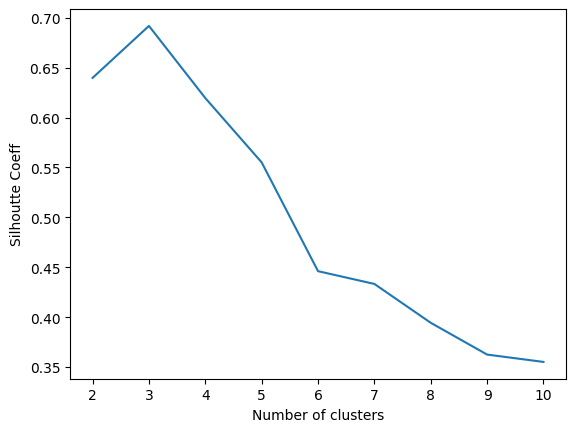

In [27]:
plt.plot(range(2,11),silhouette_coeff)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel("Silhoutte Coeff")
plt.show()